# Linear Regression From Scratch

Implementación de la regresión lineal. Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [138]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

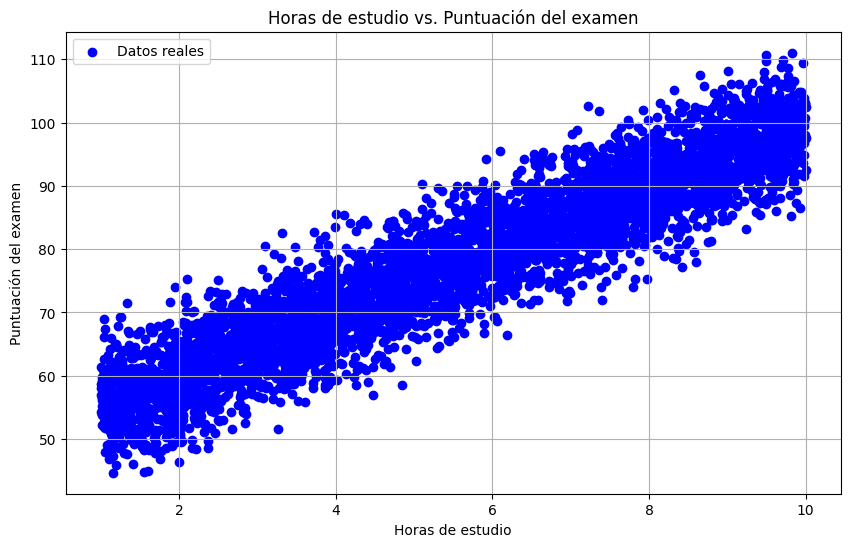

In [139]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=42)

# Imprimir el tamaño de los conjuntos
print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 4000
Datos de Validación: 500
Datos de Test: 500


## Implementación manual de la regresión con gradiente descendente

In [141]:
from IPython.display import clear_output

In [142]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    # Calculamos el error cuadrático medio (MSE)
    cost = np.mean((y_true - y_pred) ** 2)
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):

    # 1. Inicializar los coeficientes (pesos) w y b
    # w = np.zeros(X_train.shape[1])  
    w = 0
    b = 0  # Inicializa el sesgo como cero
    # 2. bucle que itere por epoch
    train_loss_per_epoch = []
    val_loss_per_epoch = []
        # Bucle para iterar por cada época
    for epoch in range(epochs):
        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_train_pred = np.dot(X_train, w) + b

        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_train_pred)
        train_loss_per_epoch.append(train_loss)

        # 5. Calcular los gradientes para los pesos w y b
        # gradiente de b es la derivada de la función de coste con respecto a b: 
        # (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]
        grad_b = (-2 / len(X_train)) * np.sum(y_train - y_train_pred)

        # gradiente de w es la derivada de la función de coste con respecto a w: 
        # (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]
        grad_w = (-2 / len(X_train)) * np.dot(X_train.T, (y_train - y_train_pred))

        # 6. Actualizar los parámetros w y b
        b = b - lr * grad_b
        w = w - lr * grad_w
        
        # Graficar la regresión en cada iteración
        if (epoch + 1) % 50 == 0 or epoch == 0 or epoch == epochs - 1:
            clear_output(wait=True)  # Borra la gráfica anterior para actualizarla
            
            plt.figure(figsize=(6, 4))
            plt.scatter(X_train, y_train, label="Datos reales", alpha=0.5)
            
            y_pred_line = w * X_train + b  # Nueva línea de regresión
            plt.plot(X_train, y_pred_line, "r--", label=f"Regresión (epoch {epoch+1})")

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.title("Actualización de la recta con Gradient Descent")
            plt.legend()
            plt.grid()
            plt.show()

        # 7. Calcular las y_pred del conjunto de validación
        y_val_pred = np.dot(X_val, w) + b

        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_val_pred)
        val_loss_per_epoch.append(val_loss)
        
        if (epoch + 1) % 50 == 0 or epoch == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+ 1}/{epochs}, Training Loss: {train_loss}, Validation Loss: {val_loss}")
        
    return w, b, train_loss_per_epoch, val_loss_per_epoch

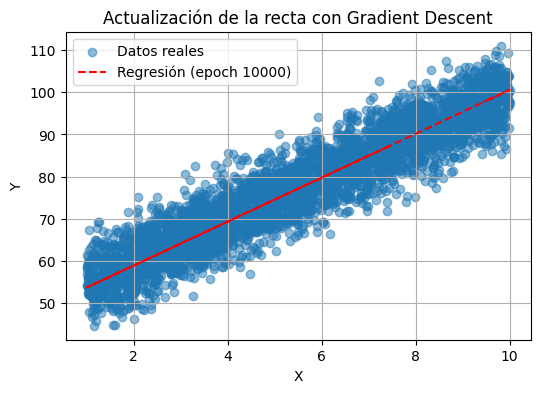

Epoch 10000/10000, Training Loss: 24.424212803113225, Validation Loss: 23.979383767437714


In [143]:
# Hiperparámetros
lr = 0.001
epochs = 10000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

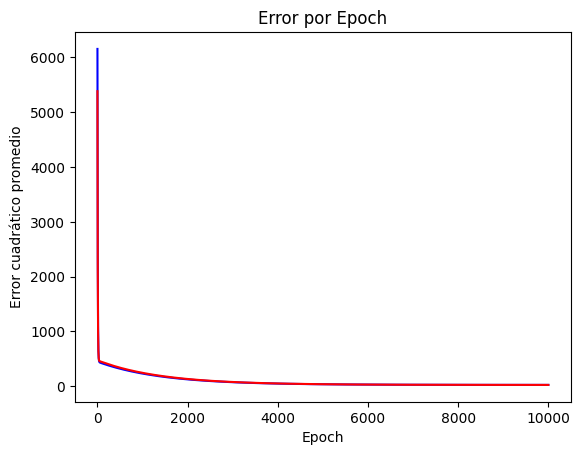

In [144]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 27.510698513379992


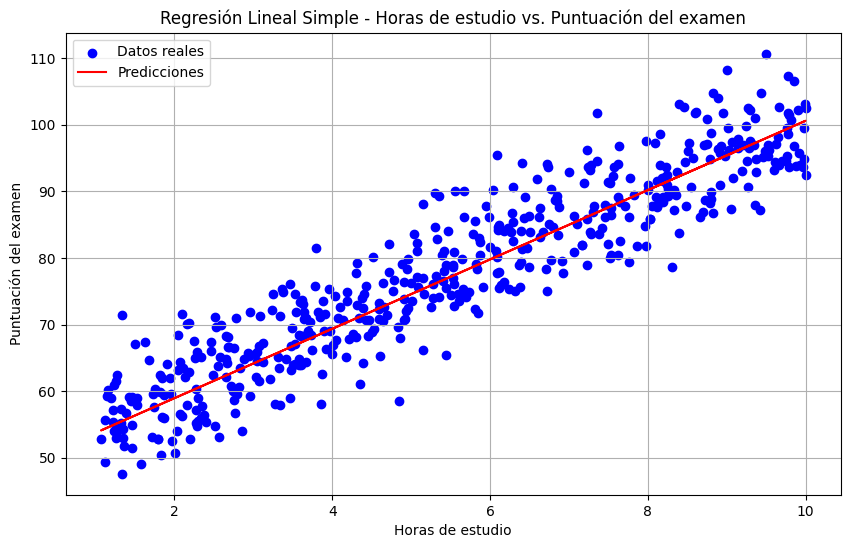

In [145]:
# Realizar predicciones en test
y_pred =  np.dot(X_test, w) + b 

# Calcular el costo
cost = cost_function(y_test, y_pred)  

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred) 

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 27.510698513379992
MAE en el conjunto de test: 4.194452676512732
R^2 en el conjunto de test: 0.8613827820569833
MAPE en el conjunto de test: 0.05520154277027883


In [147]:
print("Coeficiente de pendiente (w):", w)
print("Coeficiente de intercepción (b):", b)

Coeficiente de pendiente (w): 5.202364101788233
Coeficiente de intercepción (b): 48.5558439905208


## Implementación de la regresión lineal usando sklearn

In [148]:
# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()
# Entrenar el modelo con los datos de entrenamiento

X_train_reshaped = X_train.reshape(-1,1)

model.fit(X_train_reshaped,y_train)

LinearRegression()

Costo del modelo: 27.01349096009135


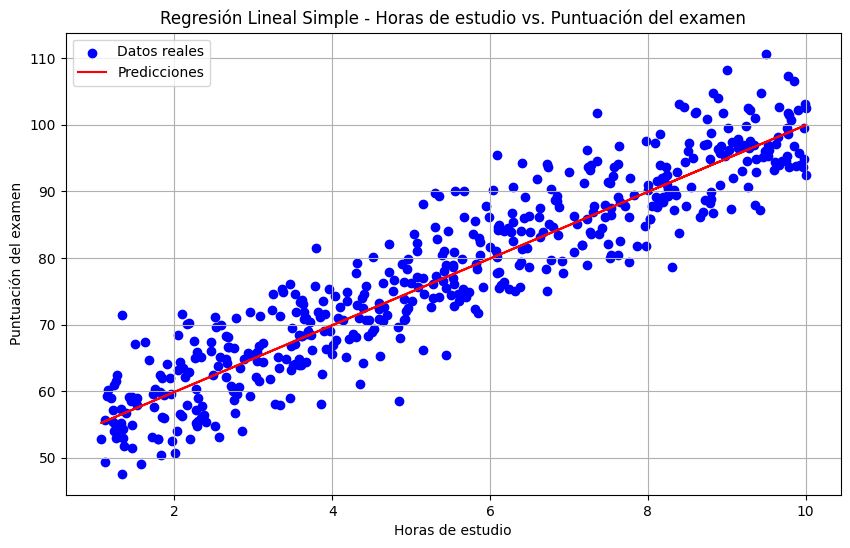

In [149]:
x_test_reshaped = X_test.reshape(-1,1)
# Realizar predicciones en test
y_pred = model.predict(x_test_reshaped)

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred) 

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 27.01349096009135
MAE en el conjunto de entrenamiento: 4.154333855338622
R^2 en el conjunto de entrenamiento: 0.863888044791174
MAPE en el conjunto de entrenamiento: 0.05491013622527726


## Comparación de parámetros obtenidos

In [151]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.5558439905208
Coeficiente de pendiente (w) - Manual: 5.202364101788233
Coeficiente de intercepción (b) - Scikit-learn: 49.883537234215794
Coeficiente de pendiente (w) - Scikit-learn: 5.002940257756676


Hemos construido un modelo de regresión lineal desde cero utilizando descenso de gradiente. Los resultados obtenidos son muy similares a los de Scikit-learn.

In [152]:
!pip freeze > requirements.txt